In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [41]:
file = pd.read_csv('data.csv')
file = file[file.columns[:-2]]
file = file.drop([0, 1]).reset_index().drop('index', axis=1)

df = pd.DataFrame()
# Q45 - Please rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q45'] = file['Q45'].replace('', np.nan)
# Q46 - Please re-rate how troubled you feel about your stressful situation. Scale 0 (not troubled)-10 (very troubled)
file['Q46'] = file['Q46'].replace('', np.nan)

df["prestress"] = file["Q45"].fillna(file["Q31"])
df["poststress"] = file["Q46"].fillna(file["Q32"])

# Q109 - How old are you? Values allowed 18 to 100
df["age"] = file['Q109']
# Q110 - How would you describe your gender identity? 1-Male, 2-Female, 4-Other
df["gender"] = file['Q110']

df["poststress"] = df["poststress"].astype(int)
df["prestress"] = df["prestress"].astype(int)
df["age"] = df["age"].astype(int)
df["gender"] = df["gender"].astype('category')

# Reward - Change in stress level
df['change'] = df['poststress'] - df['prestress']

df

,prestress,poststress,age,gender,change
0,-99,0,69,2,99
1,3,0,37,-99,-3
2,3,0,63,-99,-3
3,5,4,44,1,-1
4,5,3,90,4,-2
5,4,8,62,-99,4
6,0,6,82,4,6
7,9,4,93,1,-5
8,6,7,59,4,1
9,-99,-99,64,1,0


In [42]:
df = df[df.prestress != -99]
df = df[df.poststress != -99]
df = df[df.age != -99]
df = df[df.gender != '-99']
df.reset_index(drop=True)
df

,prestress,poststress,age,gender,change
3,5,4,44,1,-1
4,5,3,90,4,-2
6,0,6,82,4,6
7,9,4,93,1,-5
8,6,7,59,4,1
11,1,4,51,2,3
12,10,4,56,4,-6
13,7,2,27,4,-5
14,4,0,43,1,-4
15,5,8,93,4,3


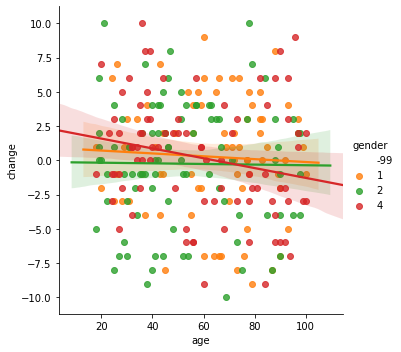

In [43]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.lmplot(y = 'change', x = 'age', hue='gender', data = df)

In [44]:
import statsmodels.formula.api as smf
model = smf.ols("change ~ age + C(gender)", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9847
Date:                Wed, 06 Nov 2019   Prob (F-statistic):              0.401
Time:                        21:17:31   Log-Likelihood:                -737.38
No. Observations:                 256   AIC:                             1483.
Df Residuals:                     252   BIC:                             1497.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8043      0.544      1.